In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [3]:
#method to create fake dataset
X, y = make_classification(n_samples = 1000, # no of samples
                          n_features =10, # nof of features
                          n_informative = 3, # no of features with higher importance in classification
                          n_redundant = 0,
                          n_repeated = 0,
                          n_classes = 2,
                          random_state = 0,
                          shuffle=False)

In [11]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X,y)
importances = forest.feature_importances_
print importances
#take std of impo
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
print std

indices = np.argsort(importances)[::-1] # np.argsort(importances) returns index array sorted by asc of values in importances array
# [::-1] reverses this index array

print "Feature ranking"

    

[ 0.25040154  0.23109364  0.14805736  0.05563166  0.05093405  0.05458341
  0.0526061   0.05110921  0.05457295  0.05101006]
[ 0.053903    0.05307449  0.03252136  0.01302339  0.01299559  0.01321203
  0.01323084  0.01212405  0.01241771  0.01284808]
Feature ranking


In [15]:
for f in range(X.shape[1]):
    print "%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]])

1. feature 0 (0.250402)
2. feature 1 (0.231094)
3. feature 2 (0.148057)
4. feature 3 (0.055632)
5. feature 5 (0.054583)
6. feature 8 (0.054573)
7. feature 6 (0.052606)
8. feature 7 (0.051109)
9. feature 9 (0.051010)
10. feature 4 (0.050934)


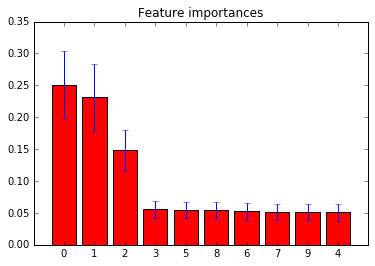

10

In [22]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]),
        importances[indices],
        color="r", 
        yerr=std[indices],
       align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]]) # set limits form -1 to 10
plt.show()
